In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#reload
df = pd.read_excel("wolves_standard_stats_scouted.xlsx")
df.head()
# print(df.columns.tolist())

# npxG+xAG -> npxG+xAG Per 90
# SCA90 -> Shot Creating Actions Per 90
# PrgA90 -> Progressive Actions Per 90
# STO90 -> Successful Take Ons Per 90
# TAP90 -> Touches in Attacking Penalty Box Per 90
# Tackles90 -> Tackles Per 90
# Int90 -> Interceptions Per 90
# Blocks90 -> Blocks Per 90
# Clear90 -> Clearances Per 90
# AW90 -> Aerials Won Per 90

,Player,Status,S,Age,MP,Starts,Min,90s,Gls,Ast,...,npxG+xAG90,SCA90,PrgA90,STO90,TAP90,Tackles90,Int90,Blocks90,Clear90,AW90
0,Rayan Aït-Nouri,left,DF,23.0,37.0,37.0,3109.0,34.5,4.0,7.0,...,0.237681,2.63,10.811594,1.82,2.78,2.58,0.75,1.22,2.17,0.64
1,João Gomes,NaN,MF,23.0,36.0,35.0,2974.0,33.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nélson Semedo,left,DF,30.0,34.0,32.0,2886.0,32.1,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,André,NaN,MF,23.0,33.0,31.0,2472.0,27.5,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Toti Gomes,NaN,DF,25.0,31.0,30.0,2614.0,29.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


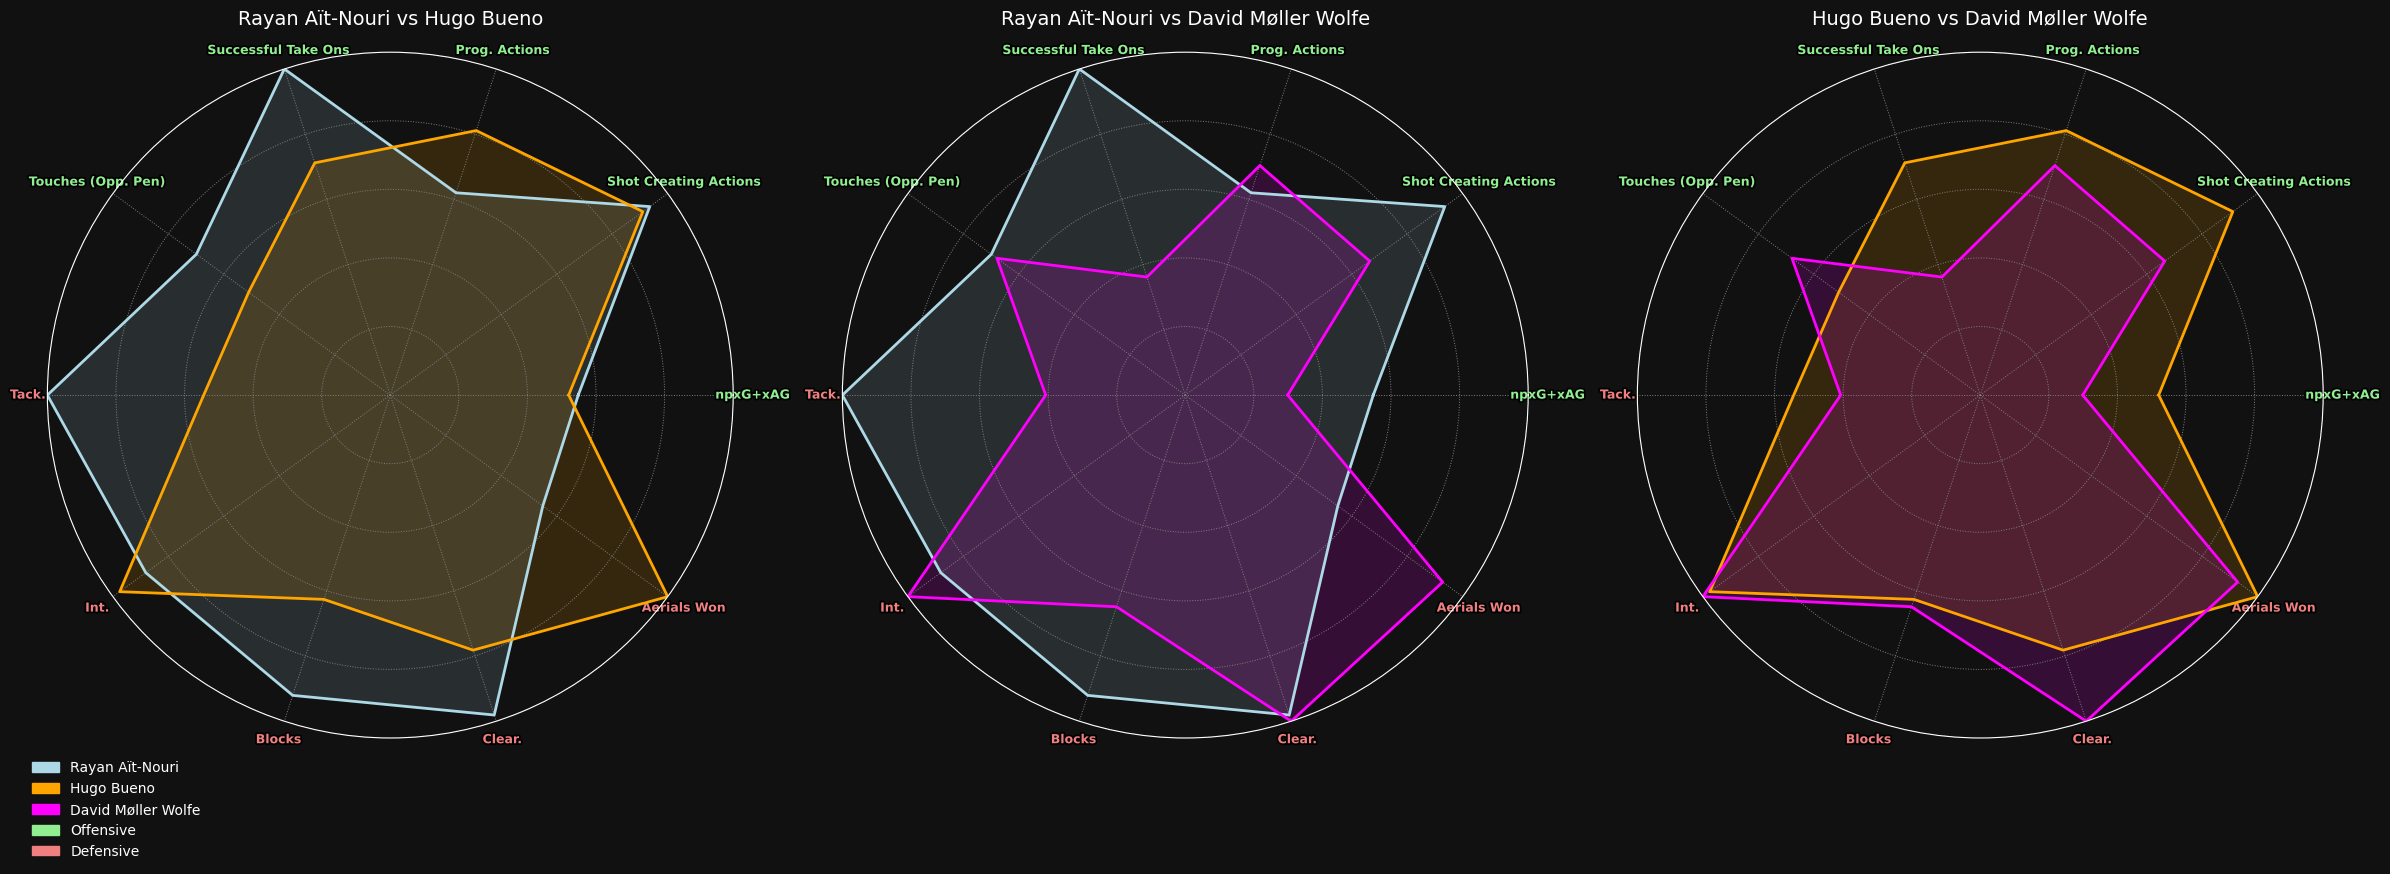

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.patheffects as path_effects


df = pd.read_excel("wolves_standard_stats_scouted.xlsx")

lwb_df = df[df["Position"] == "LWB"].copy()

metrics = ['npxG+xAG90', 'SCA90', 'PrgA90', 'STO90', 'TAP90', 
           'Tackles90', 'Int90', 'Blocks90', 'Clear90', 'AW90']

display_names = {
    'npxG+xAG90': 'npxG+xAG',
    'SCA90': 'Shot Creating Actions',
    'PrgA90': 'Prog. Actions',
    'STO90': 'Successful Take Ons',
    'TAP90': 'Touches (Opp. Pen)',
    'Tackles90': 'Tack.',
    'Int90': 'Int.',
    'Blocks90': 'Blocks',
    'Clear90': 'Clear.',
    'AW90': 'Aerials Won'
}

percentile_90 = df[metrics].quantile(0.90)
normalized_df = lwb_df.copy()
for metric in metrics:
    normalized_df[metric] = lwb_df[metric] / percentile_90[metric]
    normalized_df[metric] = normalized_df[metric].clip(upper=1)

def plot_radar_duo_subplots(df, players, colors):
    num_vars = len(metrics)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    offensive = ['npxG+xAG90', 'SCA90', 'PrgA90', 'STO90', 'TAP90']
    defensive = ['Tackles90', 'Int90', 'Blocks90', 'Clear90', 'AW90']
    labels = [display_names[m] for m in metrics]

    fig, axs = plt.subplots(1, 3, figsize=(24, 8), subplot_kw=dict(polar=True))
    fig.patch.set_facecolor('#111111')

    for ax, (player1, player2), (color1, color2) in zip(axs, players, colors):
        p1_vals = df[df['Player'] == player1][metrics].values.flatten().tolist()
        p2_vals = df[df['Player'] == player2][metrics].values.flatten().tolist()
        p1_vals += p1_vals[:1]
        p2_vals += p2_vals[:1]

        ax.set_facecolor('#111111')
        ax.plot(angles, p1_vals, label=player1, color=color1, linewidth=2)
        ax.fill(angles, p1_vals, color=color1, alpha=0.15)
        ax.plot(angles, p2_vals, label=player2, color=color2, linewidth=2)
        ax.fill(angles, p2_vals, color=color2, alpha=0.15)

        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(labels, fontsize=9)
        ax.set_yticklabels([])
        ax.set_ylim(0, 1)
        ax.tick_params(colors='white')
        ax.spines['polar'].set_color('white')
        ax.grid(color='gray', linestyle='dotted', linewidth=0.7)

        for i, metric in enumerate(metrics):
            label = ax.get_xticklabels()[i]
            if metric in offensive:
                label.set_color('lightgreen')
            elif metric in defensive:
                label.set_color('lightcoral')
            else:
                label.set_color('white')

            label.set_fontweight('bold')
            label.set_path_effects([
                path_effects.Stroke(linewidth=2.5, foreground='black'),
                path_effects.Normal()
            ])
            label.set_zorder(10)

        ax.set_title(f"{player1} vs {player2}", size=14, color='white', pad=20)

    offensive_patch = mpatches.Patch(color='lightgreen', label='Offensive')
    defensive_patch = mpatches.Patch(color='lightcoral', label='Defensive')
    player_patches = [
        mpatches.Patch(color='lightblue', label='Rayan Aït-Nouri'),
        mpatches.Patch(color='orange', label='Hugo Bueno'),
        mpatches.Patch(color='magenta', label='David Møller Wolfe')
    ]

    fig.legend(
        handles=player_patches + [offensive_patch, defensive_patch],
        loc='lower left',
        bbox_to_anchor=(0.01, -0.1),
        ncol=1,
        labelcolor='white',
        frameon=False
    )

    plt.tight_layout()
    plt.show()

plot_radar_duo_subplots(
    normalized_df,
    players=[
        ("Rayan Aït-Nouri", "Hugo Bueno"),
        ("Rayan Aït-Nouri", "David Møller Wolfe"),
        ("Hugo Bueno", "David Møller Wolfe")
    ],
    colors=[
        ('lightblue', 'orange'),
        ('lightblue', 'magenta'),
        ('orange', 'magenta')
    ]
)
